# Topic Modeling

### Load relevant libraries and data

In [1]:
# for data manipulation
import numpy as np
import pandas as pd
import ast

# for reproducibility
import random

# for top2vec
from top2vec import Top2Vec

/opt/conda/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

In [16]:
# import the data (not fully pre-processed)
df = pd.read_csv('df_reviews_final_binary.csv')

In [17]:
# check shape
df.shape

(660645, 14)

In [18]:
# check first rows
df.head()

,review_comments,review_createdAt,review_id,review_rating,review_localizedDate,review_author.id,review_language,url,name,stars,numberOfGuests,isHostedBySuperhost,language,review_length
0,great location close to main public transport ...,2023-05-16T11:18:48Z,8.925406e+17,positive,May 2023,505581167.0,NaN,https://www.airbnb.com/rooms/48458370,※ Flatista Homes - Hirschgarten ※ 6 Guests ※ 3...,4.85,6.0,False,en,27
1,i am a family of four and this flat can accomm...,2023-04-27T13:02:21Z,8.788220e+17,positive,April 2023,22188522.0,NaN,https://www.airbnb.com/rooms/48458370,※ Flatista Homes - Hirschgarten ※ 6 Guests ※ 3...,4.85,6.0,False,en,41
2,place was wonderful had plenty of room for us ...,2023-04-25T12:09:56Z,8.773460e+17,positive,April 2023,1931393.0,NaN,https://www.airbnb.com/rooms/48458370,※ Flatista Homes - Hirschgarten ※ 6 Guests ※ 3...,4.85,6.0,False,en,33
3,was at a great location truly only a couple...,2023-03-25T12:23:12Z,8.548847e+17,positive,March 2023,226925204.0,NaN,https://www.airbnb.com/rooms/48458370,※ Flatista Homes - Hirschgarten ※ 6 Guests ※ 3...,4.85,6.0,False,en,60
4,great place and was perfect for the weekend no...,2023-03-19T13:51:52Z,8.505806e+17,positive,March 2023,123763011.0,NaN,https://www.airbnb.com/rooms/48458370,※ Flatista Homes - Hirschgarten ※ 6 Guests ※ 3...,4.85,6.0,False,en,25


In [2]:
# for reproducibility
random.seed(42)

In [8]:
# initiate model
model = Top2Vec(df['review_comments'].tolist())

2023-05-28 18:28:44,005 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-05-28 18:29:44,155 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-05-28 19:15:53,030 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-05-28 19:24:51,312 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-05-28 19:26:15,168 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [19]:
# check size of largest 20 topics
topic_sizes, topic_nums = model.get_topic_sizes()
print(topic_sizes[:20])

[6210 4608 3421 3281 2890 1753 1560 1436 1366 1281 1272 1241 1227  999
  980  971  965  957  949  929]


In [20]:
# check number of topics identified
print(topic_nums)

[   0    1    2 ... 5677 5678 5679]


In [22]:
# get largest 20 topics
topic_words, word_scores, topic_nums = model.get_topics(20)

In [23]:
# discover largest 20 topics
for words, scores, num in zip(topic_words, word_scores, topic_nums):
    print(num)
    print(f'Words: {words}')

0
Words: ['thanks' 'again' 'definately' 'definitely' 'certainly' 'll' 'would'
 'visit' 'book' 'come' 'anytime' 'highly' 'choose' 'heartbeat' 'future'
 'thank' 'recommend' 'next' 'communicate' 'consider' 'everyone' 'love'
 'will' 'happily' 'totally' 'strongly' 'hesitate' 'communicating'
 'reccomend' 'soon' 'back' 'communicative' 'def' 'surely' 'enjoyable'
 'visiting' 'try' 'returning' 'return' 'recommended' 'choice' 'coming'
 'happy' 'offer' 'awesome' 'anybody' 'advise' 'hopefully' 'gladly' 'here']
1
Words: ['future' 'return' 'hope' 'gladly' 'll' 'certainly' 'planning' 'visiting'
 'others' 'plan' 'hesitate' 'heartbeat' 'anyone' 'happily' 'consider'
 'course' 'happy' 'again' 'enjoyable' 'book' 'thanks' 'see' 'considering'
 'choose' 'either' 'anytime' 'pleased' 'visit' 'come' 'someday' 'chance'
 'maybe' 'going' 'ourselves' 'trips' 'summary' 'getting' 'should' 'option'
 'doing' 'try' 'case' 'lastly' 'love' 'using' 'soon' 'wouldn' 'then'
 'definately' 'think']
2
Words: ['definetly' 'defenit

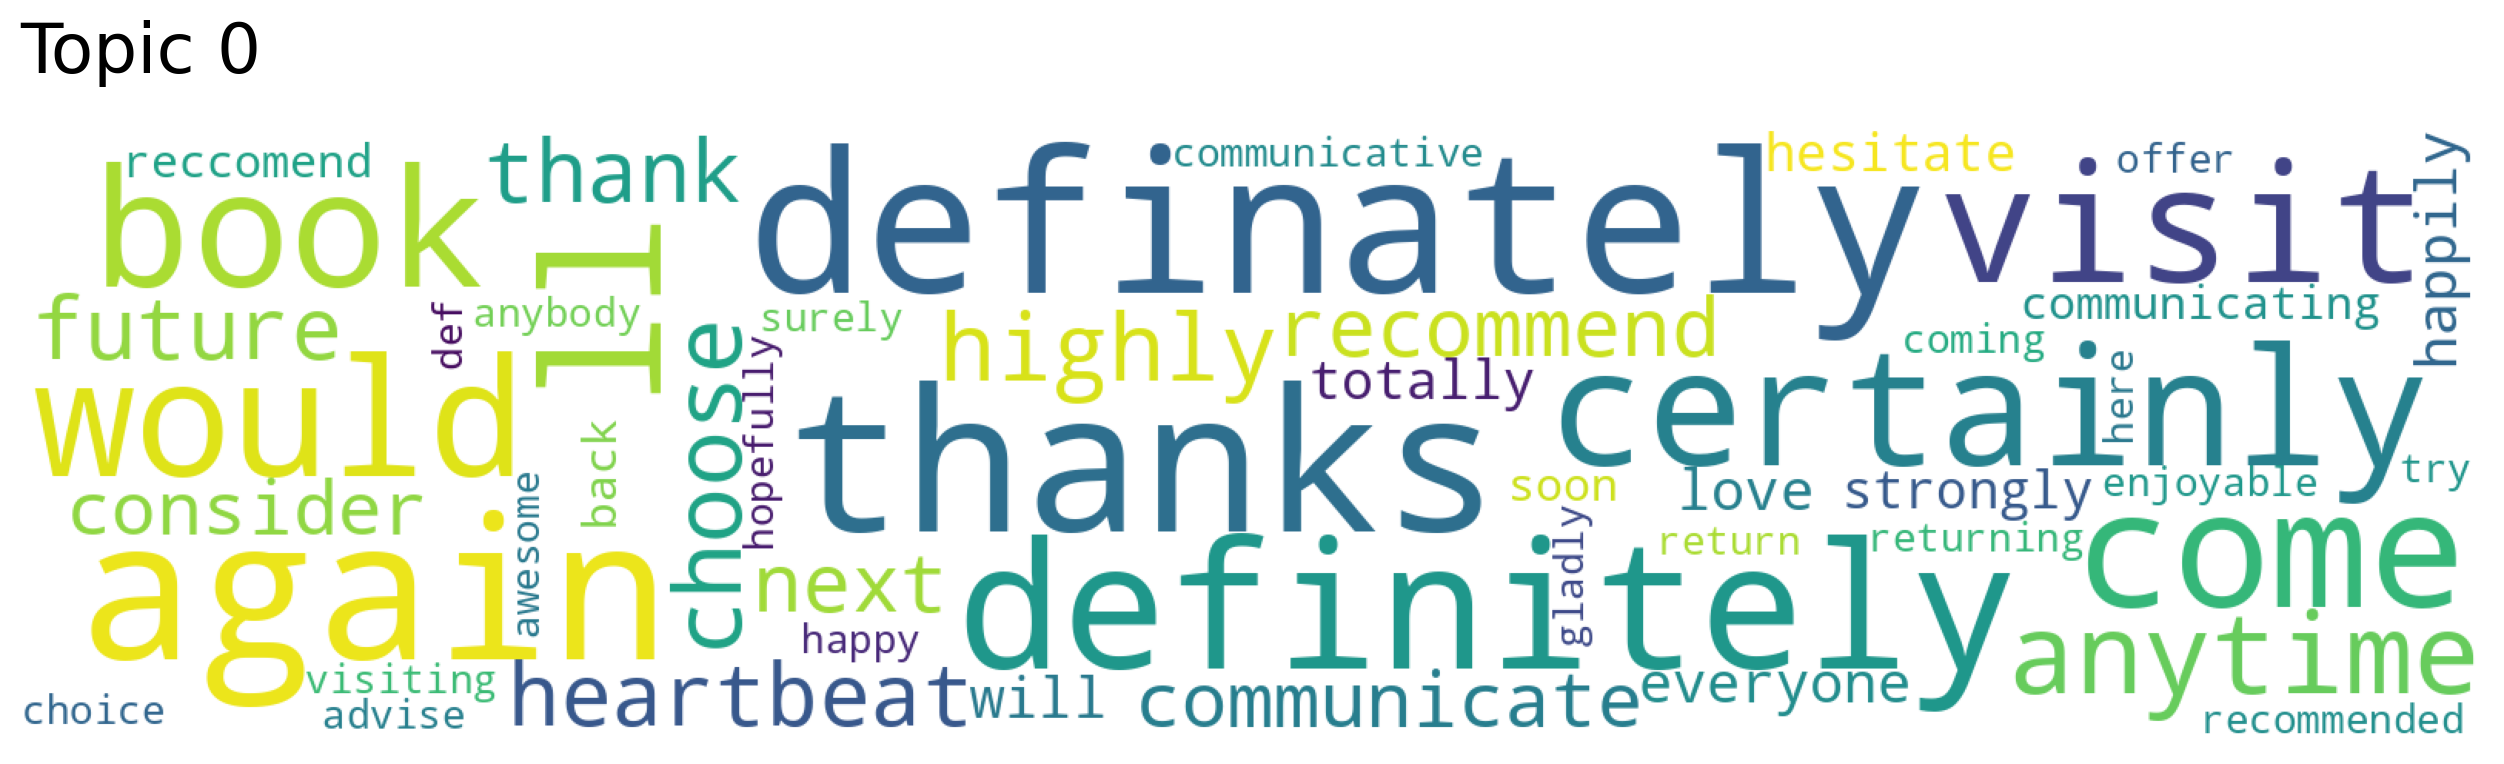

In [24]:
# generate wordcloud of largest topic
model.generate_topic_wordcloud(0, background_color='white')

In [28]:
# check appearance of price as topic
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["price"], num_topics=3)

In [29]:
# price as topic
for words, scores, num in zip(topic_words, word_scores, topic_nums):
    print(num)
    print(f'Words: {words}')

3
Words: ['future' 'thanks' 'll' 'choose' 'definately' 'next' 'happy' 'certainly'
 'coming' 'consider' 'anytime' 'totally' 'option' 'visiting' 'hope' 'come'
 'suggest' 'again' 'love' 'strongly' 'highly' 'complete' 'considering'
 'others' 'going' 'heartbeat' 'definitely' 'case' 'try' 'return' 'gladly'
 'reliable' 'everyone' 'back' 'happily' 'will' 'visit' 'thank' 'soon'
 'lastly' 'surely' 'chance' 'course' 'book' 'anyone' 'addition' 'making'
 'should' 'pleasure' 'wait']
88
Words: ['summary' 'reasonable' 'value' 'helps' 'price' 'connections' 'gladly'
 'cheap' 'reliable' 'considering' 'solid' 'decent' 'strongly' 'certainly'
 'fast' 'anytime' 'recommended' 'money' 'metres' 'replies' 'definately'
 'priced' 'recommendable' 'general' 'superb' 'thanks' 'll' 'connection'
 'otherwise' 'future' 'ok' 'required' 'responds' 'choose' 'option'
 'meters' 'happily' 'highly' 'overall' 'surely' 'totally' 'relatively'
 'simple' 'probably' 'accomodation' 'indeed' 'range' 'works' 'same'
 'speed']
0
Words: ['

Topic that makes sense for price is ranked number 88, so it is a very small topic!